In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import *
from sklearn.metrics import accuracy_score

# Read dataset

In [12]:
test_set = pd.read_csv('test.csv')
train_set = pd.read_csv('train.csv')
sub_set = pd.read_csv('sample_submission.csv')
train_set.shape, test_set.shape, sub_set.shape

((19219, 35), (12814, 28), (12814, 8))

# Prepare dataset

In [13]:
train_set.drop('id', axis=1, inplace=True)

In [14]:
train_set.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [15]:
train_set.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Em

In [17]:
train_set

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [18]:
X = train_set[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = train_set[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]

# Handling Outliers

C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9856\1352945540.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.where((X[col] > upper_cap), X[col].quantile(0.75), X[col])
C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9856\1352945540.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.where((X[col] < lower_cap), X[col].quantile(0.25), X[col])
C:\Users\Darab Store\AppData\Local\Temp\ipykernel_9856\1352945540.py:10: SettingWithCopyWarning: 
A value is trying to be set on a c

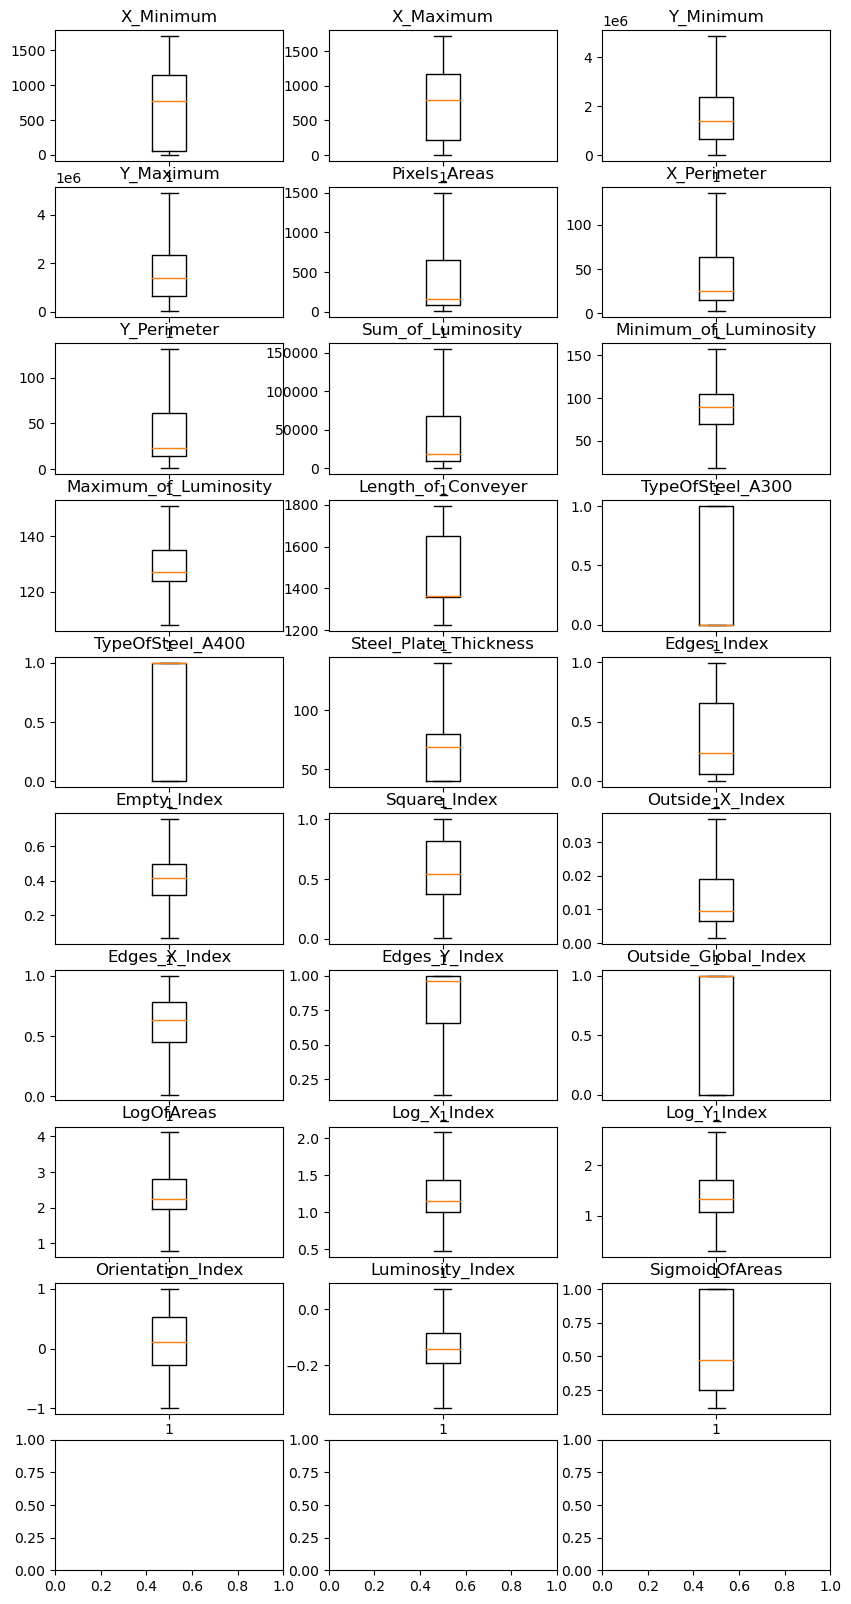

In [10]:
for col in X.columns:
    if X[col].dtypes != 'object':
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_cap = Q3 + 1.5*IQR
        lower_cap = Q1 - 1.5*IQR
        
        flags = (X[col] > upper_cap) | (X[col] < lower_cap)
        X[col] = np.where((X[col] > upper_cap), X[col].quantile(0.75), X[col])
        X[col] = np.where((X[col] < lower_cap), X[col].quantile(0.25), X[col])
        
fig, axes = plt.subplots(10, 3, figsize=(10, 20))
axes_flat = axes.flatten()
for i, col in enumerate(X.columns):
    ax = axes_flat[i]
    ax.boxplot(X[col])
    ax.set_title(col)

# Normalize

In [19]:
norm = StandardScaler()
X = norm.fit_transform(X)
X.shape

(19219, 27)

In [20]:
y = y.to_numpy()

In [21]:
y.shape

(19219, 7)

# Split

In [23]:
x_train ,x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=77)
x_train.shape, x_valid.shape

((15375, 27), (3844, 27))

# Build a model

In [26]:
xgb = XGBClassifier(n_estimators=200, max_depth=60, learning_rate=0.9,objective='binary:logistic',
                    subsample=0.9, random_state=8, n_jobs=5)
xgb.fit(x_train, y_train)
yhat = xgb.predict(x_valid)
print(f'Score: {xgb.score(x_valid, y_valid)}, acc : {accuracy_score(y_valid, yhat)}')

Score: 0.3909989594172737, acc : 0.3909989594172737


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=15, max_features=1., max_samples=0.8, n_jobs=10, random_state=41)
rfc.fit(x_train, y_train)
yhat = rfc.predict(x_valid)
print(f'Score: {rfc.score(x_valid, y_valid)}, acc : {accuracy_score(y_valid, yhat)}')